In [1]:
%pylab inline
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Simulation_functions import *
from ABC_functions import *
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.ticker as ticker

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Each sim ~6 seconds
# 10 sims ~ 1 min
# 6 s * 3 mu = 18 settings, each 20 -> 360 sims -> 36 mins?
def main():
    fig_num = 0
    num_sims = 40
    use_symmetric_model = False
    # Simulation parameters
    num_alleles = 25
    n_effec = 7310
    max_iter = 55920
    end_samp_n = 6500

    # Mutation model parameters
    #mu = 10**-3
    beta = 0.3
    p = 0.9
    L = 0.33
    sval_list = [10**-5,10**-4,10**-3,10**-2,10**-1]
    mu_list = [10**-5,10**-4,10**-3]
    for mu in mu_list:
        average_list = []
        std_list= []
        for sval in sval_list:

            print('Done')
            list_modal_allele = []
            for i in range(0, num_sims):
                allele_freqs_20k, allele_freqs_50k, allele_freqs_euro = Simulate(num_alleles, n_effec, mu, beta, p, L, sval, max_iter, end_samp_n, symmetric_model=use_symmetric_model)


                allele_freqs_euro_list = list(allele_freqs_euro)
                #print(allele_freqs_euro_list)
                max_value = max(allele_freqs_euro_list)
                #print(max_value)
                max_index = allele_freqs_euro_list.index(max_value)
                #print(max_index)
                modal_allele = max_index-12
                list_modal_allele.append(modal_allele)
            fig_num = fig_num +  1
            plt.figure(fig_num)

            plt.hist(list_modal_allele,bins = [-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5,4.5])
            plt.title('Mu = %.2E, s = %.2E'%(mu,sval))
            plt.xlabel('Modal allele')
            plt.ylabel('Frequency')
            plt.savefig('Uni Mu = %.2E, s = %.2E.pdf'%(mu,sval))

            average = np.mean(list_modal_allele)
            average_list.append(average)
            std_list.append(np.std(list_modal_allele))
        fig_num = fig_num +  1
        plt.figure(fig_num)

        plt.errorbar(sval_list,average_list,yerr = std_list,marker = 'o')
        plt.title('Mu = %.2E'%(mu))
        plt.xlabel('S value')
        plt.ylabel('Average modal allele')
        plt.xscale('log')
        plt.savefig('Line graph Uni Mu = %.2E.pdf'%(mu))

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
CPU times: user 55min 17s, sys: 5.55 s, total: 55min 23s
Wall time: 55min 36s


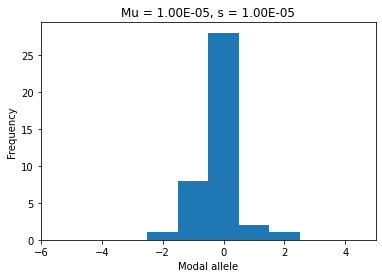

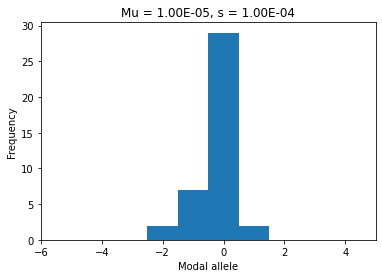

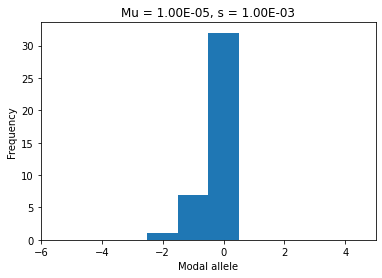

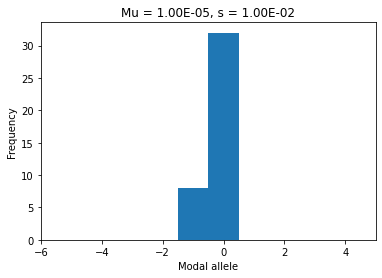

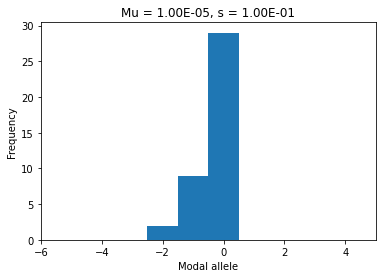

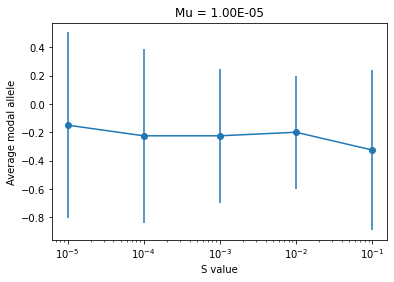

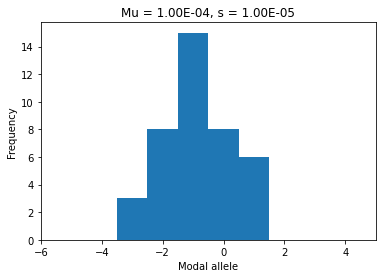

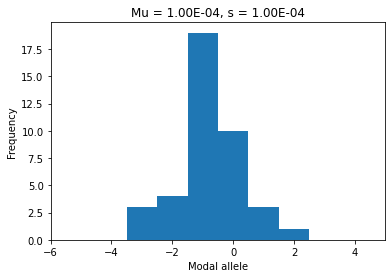

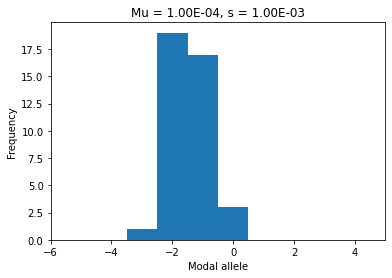

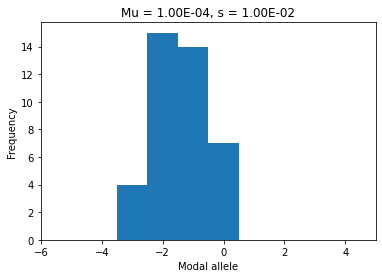

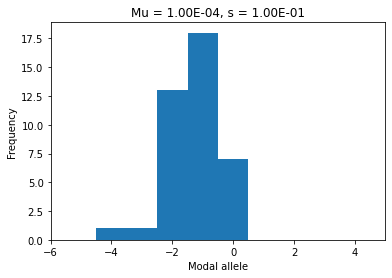

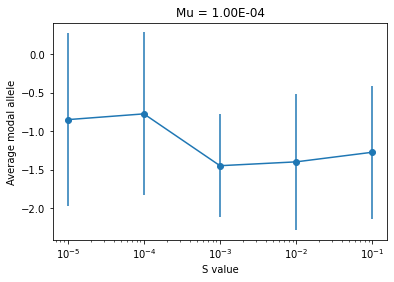

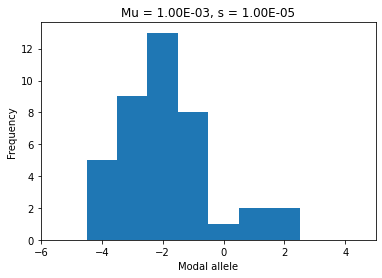

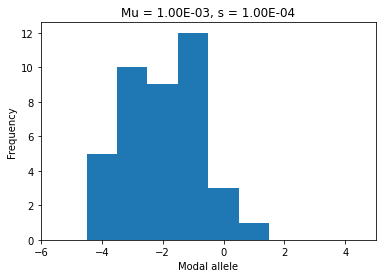

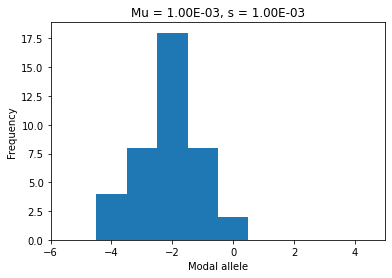

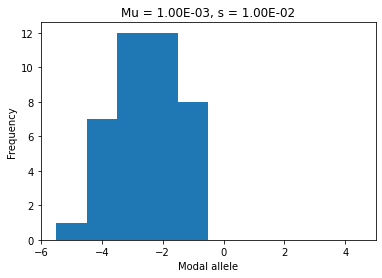

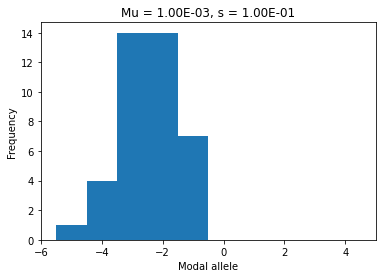

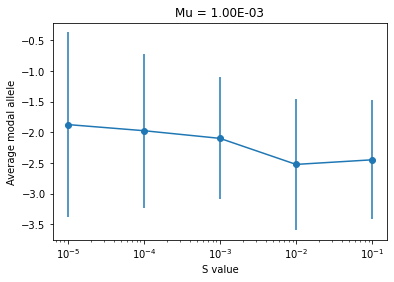

In [3]:
%%time
if __name__ == '__main__':
    main()